# Image processing Script

In [24]:
# imports

from matplotlib.image import imread
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np

In [25]:
# Creating the RGB image
rgb_image = imread("mage.jpg")
red,green,blue = rgb_image[:,:,0], rgb_image[:,:,1], rgb_image[:,:,2] # Getting the image channels

g = 1.04
r_coeff, g_coeff, b_coeff = 0.2126, 0.7152, 0.0722
gray_image = r_coeff*red**g + g_coeff*green**g + b_coeff*blue**g

FileNotFoundError: [Errno 2] No such file or directory: '/home/tohlang/OneDrive/2025/Veri/Filter/mage.jpg'

/tmp/ipykernel_8265/4129026012.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  img2.imshow(gray_image, cmap=plt.cm.get_cmap("gray"))
/tmp/ipykernel_8265/4129026012.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


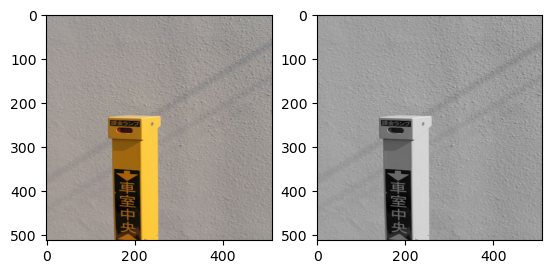

In [4]:
# Outputting the images

fig = plt.figure(1)
img1,img2 = fig.add_subplot(121), fig.add_subplot(122)

img1.imshow(rgb_image)
img2.imshow(gray_image, cmap=plt.cm.get_cmap("gray"))

fig.show()
plt.show()

In [ ]:
#Save greyscale image.
gray_image = np.clip(gray_image, 0, 255).astype(np.uint8)
mpimg.imsave('grayscale_output.png', gray_image, cmap='gray') # Save as png


# Save as .hex textfile
r,c = gray_image.shape[0],gray_image.shape[1]
with open('output_2d.hex', 'w') as f:
    for i in range(r):
        for j in range(c):
            if i==r-1 and j==c-1:
                f.write(f"{gray_image[i,j]:x}")
            else:
                f.write(f"{gray_image[i,j]:x}\n")


In [6]:
gray_image.shape

(512, 512)

In [26]:
with open('out.hex', 'r') as f:
    hex_data = f.read().split()

# Convert hex strings to integers
int_data = [int(byte, 16) for byte in hex_data]

# Convert to NumPy array
arr = np.array(int_data, dtype=np.uint8)
#print(arr)

arr2 = arr.reshape((512, 512))
arr2

mpimg.imsave('fpga_output.png', arr2, cmap='gray') # Save as png


FileNotFoundError: [Errno 2] No such file or directory: 'out.hex'

In [27]:
with open('out/golden_output.hex', 'r') as f:
    hex_data = f.read().split()

# Convert hex strings to integers
int_data = [int(byte, 16) for byte in hex_data]

# Convert to NumPy array
arr = np.array(int_data, dtype=np.uint8)
#print(arr)

arr2 = arr.reshape((512, 512))
arr2

array([[188, 180, 175, ..., 178, 175, 190],
       [189, 185, 184, ..., 184, 179, 194],
       [184, 185, 188, ..., 186, 162, 156],
       ...,
       [169, 180, 188, ..., 179, 185, 186],
       [164, 176, 185, ..., 182, 186, 189],
       [155, 169, 181, ..., 180, 185, 187]], dtype=uint8)

In [28]:
arr3 = arr2[0:10,0:10]

def medianFilter(arr):
    a,b = np.shape(arr)
    print(a,b)
    result = np.zeros((a,b), dtype=np.uint8)
    for i in range(a):
        #print(i, end="")
        for j in range(b):

            if(i==0 or i==a-1 or j==0 or j==b-1):
                result[i][j] = arr[i][j]
            else:
                #print(arr[i-1:i+2, j-1:j+2])
                #print("median =", np.median(arr[i-1:i+2, j-1:j+2]))
                result[i][j] = (np.median(arr[i-1:i+2, j-1:j+2]))
            result
    
    return result

filterd = medianFilter(arr2)
filterd


512 512


array([[188, 180, 175, ..., 178, 175, 190],
       [189, 185, 185, ..., 179, 179, 194],
       [184, 188, 188, ..., 188, 186, 156],
       ...,
       [169, 180, 188, ..., 182, 186, 186],
       [164, 176, 185, ..., 182, 185, 189],
       [155, 169, 181, ..., 180, 185, 187]], dtype=uint8)

In [67]:
filterd

array([[175, 180, 188, ..., 178, 175, 190],
       [184, 182, 186, ..., 181, 178, 194],
       [184, 184, 186, ..., 187, 181, 156],
       ...,
       [169, 174, 184, ..., 177, 184, 186],
       [164, 172, 182, ..., 180, 183, 189],
       [155, 169, 181, ..., 180, 185, 187]], dtype=uint8)

array([], shape=(0, 0), dtype=uint8)

In [107]:
# Median filtered output
#mpimg.imsave('og.png', arr2, cmap='gray') # Save as png
mpimg.imsave('filtered.png', filterd, cmap='gray') # Save as png

In [108]:
# Save as .hex textfile
r,c = filterd.shape[0],filterd.shape[1]
with open('out/golden_blur.hex', 'w') as f:
    for i in range(r):
        for j in range(c):
            if i==r-1 and j==c-1 :
                f.write(f"{filterd[i,j]:x}")
            else:
                f.write(f"{filterd[i,j]:x}\n")

In [15]:
with open('out/out2.hex', 'r') as f:
    hex_data = f.read().split()

# Convert hex strings to integers
int_data = [int(byte, 16) for byte in hex_data]

# Convert to NumPy array
arr = np.array(int_data, dtype=np.uint8)
#print(arr)

arr2 = arr.reshape((512, 512))
np.shape(arr2)

mpimg.imsave('new.png', arr2, cmap='gray') # Save as png

In [120]:

import cv2
import numpy as np

# Apply Sobel in X and Y directions
sobel_x = cv2.Sobel(arr2, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(arr2, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize (optional but useful for display or thresholding)
# magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
#print(magnitude)
magnitude = magnitude.astype(np.uint8)

# Apply threshold
threshold_value = 100  # adjust as needed
edges = (magnitude > threshold_value).astype(np.uint8) * 255

mpimg.imsave('new2.png', edges, cmap='gray') # Save as png

In [33]:

import numpy as np

def sobel_filter(image):
    # Define Sobel kernels
    Kx = np.array([[ -1,  0,  1],
                   [ -2,  0,  2],
                   [ -1,  0,  1]])

    Ky = np.array([[ -1, -2, -1],
                   [  0,  0,  0],
                   [  1,  2,  1]])

    # Image dimensions
    h, w = image.shape

    # Output gradient magnitude image
    output = np.zeros((h, w), dtype=np.uint8)


    # Pad image with 0s on the border (so we can apply 3x3 kernels)
    padded = np.pad(image, pad_width=1, mode='constant', constant_values=0)
    
    thresh = 150
    

    # Apply convolution
    for i in range(1, h-1):
        for j in range(1, w-1):
            region = image[i-1:i+2, j-1:j+2]
            gx = np.sum(Kx * region)
            gy = np.sum(Ky * region)
            #output[i-1, j-1] = np.sqrt(gx**2 + gy**2)
            temp = (abs(gx) + abs(gy))

            if(i==1 and (j>=60 and j<=65)):
                print(temp,": ",region)
            
            if(temp > thresh):
                output[i,j] = 255
            else:
                output[i,j] = 0

    return output


In [34]:
mbrr = sobel_filter(filterd)

threshold_value = 100  # adjust as needed
edges = (arr2 > threshold_value).astype(np.uint8) * 255

48 :  [[186 185 177]
 [185 178 175]
 [187 182 175]]
38 :  [[185 177 184]
 [178 175 173]
 [182 175 173]]
104 :  [[177 184 207]
 [175 173 184]
 [175 173 178]]
166 :  [[184 207 206]
 [173 184 194]
 [173 178 187]]
108 :  [[207 206 203]
 [184 194 194]
 [178 187 192]]
54 :  [[206 203 197]
 [194 194 192]
 [187 192 192]]


In [39]:
mpimg.imsave('new.png', arr22, cmap='gray') # Save as png

In [36]:
# Save as .hex textfile
filterd = mbrr
r,c = filterd.shape[0],filterd.shape[1]
with open('out/golden_sobel.hex', 'w') as f:
    for i in range(r):
        for j in range(c):
            if i==r-1 and j==c-1 :
                f.write(f"{filterd[i,j]:x}")
            else:
                f.write(f"{filterd[i,j]:x}\n")

In [38]:

with open('out/sobel.hex', 'r') as f:
    hex_data = f.read().split()

# Convert hex strings to integers
int_data = [int(byte, 16) for byte in hex_data]

# Convert to NumPy array
arr = np.array(int_data, dtype=np.uint8)
#print(arr)

arr22 = arr.reshape((512, 512))
np.shape(arr22)

mpimg.imsave('new.png', arr22, cmap='gray') # Save as png

In [12]:
a = [[184,173,173],
[207,184,178],
[206,194,187]]

b = np.array(a)
b

array([[184, 173, 173],
       [207, 184, 178],
       [206, 194, 187]])

In [13]:
sobel_filter(b)

166

In [23]:
print(arr2[0:3,55:70])

[[186 187 187 185 186 185 177 184 207 206 203 197 192 187 185]
 [194 192 191 187 185 178 175 173 184 194 194 192 191 190 190]
 [194 192 192 191 187 182 175 173 178 187 192 192 192 190 190]]
